In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

In [2]:
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

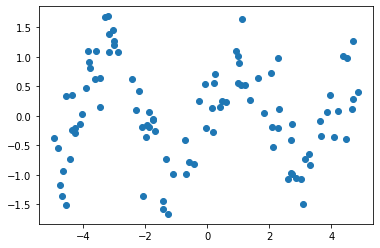

In [19]:
np.random.seed(42)
X = np.random.uniform(-5, 5, (101, 1))
Y = np.sin(3 * X / 2) + 2 * np.random.normal(0, 0.25, X.shape)
plt.scatter(X, Y)
plt.show()

In [22]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, Y)

/home/jason/miniconda3/envs/gp_p38/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1))

In [23]:
gp.kernel_

0.00316**2 + Matern(length_scale=1.33, nu=1.5) + WhiteKernel(noise_level=0.201)

In [24]:
x_pred = np.linspace(-6, 6).reshape(-1, 1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

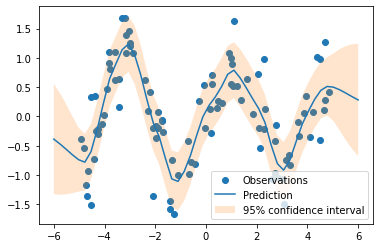

In [33]:
plt.scatter(X, Y, label='Observations')
plt.plot(x_pred, y_pred, label='Prediction')
plt.fill_between(x_pred.flatten(), y_pred-sigma, y_pred+sigma, alpha=0.2, label='95% confidence interval')
plt.legend()
plt.show()